In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from qutip import *

In [3]:
import numpy as np

In [4]:
import time 

In [5]:
#no of levels in the Fock space
N0=8
N1=8
N2=8
K=1.0
g=1.0
w0=2*np.pi

#damping rates
gamma0=0
gamma1=0
gamma2=0


alpha=sqrt(1)#initial coherent state param for mode 0
#epsilon=0.5j #sqeezing parameter


tfinal=5.0
dt=0.01
tlist=arange(0.0,tfinal+dt,dt)
taulist=K*tlist
#ntraj=100


#define operators
a0=tensor(destroy(N0),qeye(N1),qeye(N2))
a1=tensor(qeye(N0),destroy(N1),qeye(N2))
a2=tensor(qeye(N0),qeye(N1),destroy(N2))



#number operators for each mode
num0=a0.dag()*a0
num1=a1.dag()*a1
num2=a2.dag()*a2

#local current operators
cur1=a0*a1.dag()
cur2=a1*a2.dag()
cur3=a2*a0.dag()

#dissipative operators
C0=sqrt(2.0*gamma0)*a0
C1=sqrt(2.0*gamma1)*a1
C2=sqrt(2.0*gamma2)*a2




#initial state
vacuum=tensor(basis(N0,0),basis(N1,0),basis(N2,0))
D=(alpha*a0.dag()-conj(alpha)*a0).expm()
psi0=D*vacuum


# Hamiltonian

H0=w0*(2*(a0*a0.dag()+a1*a1.dag()+a2*a2.dag())+g*(a0.dag()*a1+a1.dag()*a2+a2.dag()*a0+a1.dag()*a0+a2.dag()*a1+a0.dag()*a2))
H= H0+ K*(a0+a0.dag()+a1+a1.dag()+a2+a2.dag())


#run
start_time=time.time()
#avg=mcsolve(H,psi0,taulist,ntraj,[C0,C1,C2],[num0,num1,num2])
output=mesolve(H,psi0,taulist,[C0,C1,C2],[num0,num1,num2])
current=mesolve(H,psi0,taulist,[C0,C1,C2],[cur1,cur2,cur3])
avg=output.expect
lcurrent=current.expect
finish_time=time.time()
print('time elapsed = ',finish_time-start_time)


time elapsed =  412.76911187171936


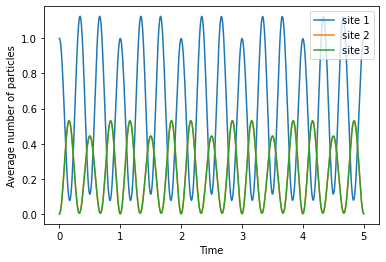

In [6]:
#plot expectation value for photon number in each mode
plot(taulist,avg[0],taulist,avg[1],taulist,avg[2])
xlabel("Time")
ylabel("Average number of particles")
legend(('site 1', 'site 2','site 3'));
savefig('t_nd_n2_3th0_g')


/Users/atlantis/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


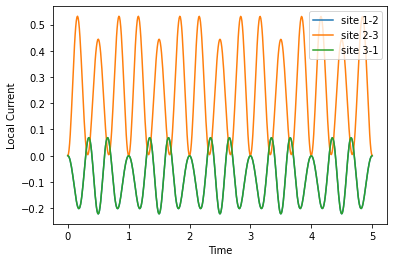

In [7]:
#plot expectation value for photon number in each mode

plot(taulist,lcurrent[0],taulist,lcurrent[1],taulist,lcurrent[2])
xlabel("Time")
ylabel("Local Current")
legend(('site 1-2', 'site 2-3','site 3-1'));
savefig('cur_d2_n2_3th0_g')